In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
import os
os.path

<module 'ntpath' from 'F:\\ProgramFiles\\Anaconda\\lib\\ntpath.py'>

In [47]:
pd_dt = pd.read_excel("shk_stat.xlsx")
pd_dt.head()

,№ п/п,№ КПП,Дата,штук,Время,Описание события,Направление движения,Характер груза,без дв,часовой,ежеминутные,дождь,гроза,не сраб,сигнал
0,1,АКПП №2,2019-02-27,9,NaN,сработка без движения,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,АКПП №2,2019-03-05,1,NaN,"сработка без движения, часовой",NaN,NaN,1.0,24.0,NaN,NaN,NaN,NaN,NaN
2,3,ЖДКПП,2019-03-06,1,NaN,часовой,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,4,ЖДКПП,2019-03-06,1,NaN,"сработка без движения, ежеминутные",NaN,NaN,1.0,NaN,24.0,NaN,NaN,NaN,NaN
4,5,ЖДКПП,2019-03-11,1,NaN,сработка без движения,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
pd1 = pd_dt.dropna(axis = 1, how="all")
pd1.head()

,№ п/п,№ КПП,Дата,штук,Описание события,Направление движения,без дв,часовой,ежеминутные,дождь,гроза,не сраб,сигнал
0,1,АКПП №2,2019-02-27,9,сработка без движения,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,АКПП №2,2019-03-05,1,"сработка без движения, часовой",NaN,1.0,24.0,NaN,NaN,NaN,NaN,NaN
2,3,ЖДКПП,2019-03-06,1,часовой,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,4,ЖДКПП,2019-03-06,1,"сработка без движения, ежеминутные",NaN,1.0,NaN,24.0,NaN,NaN,NaN,NaN
4,5,ЖДКПП,2019-03-11,1,сработка без движения,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
pd2 = pd1.fillna(0)
pd2.head()

,№ п/п,№ КПП,Дата,штук,Описание события,Направление движения,без дв,часовой,ежеминутные,дождь,гроза,не сраб,сигнал
0,1,АКПП №2,2019-02-27,9,сработка без движения,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,АКПП №2,2019-03-05,1,"сработка без движения, часовой",0,1.0,24.0,0.0,0.0,0.0,0.0,0.0
2,3,ЖДКПП,2019-03-06,1,часовой,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,ЖДКПП,2019-03-06,1,"сработка без движения, ежеминутные",0,1.0,0.0,24.0,0.0,0.0,0.0,0.0
4,5,ЖДКПП,2019-03-11,1,сработка без движения,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
pd2["Описание события"].unique()

array(['сработка без движения', 'сработка без движения, часовой',
       'часовой', 'сработка без движения, ежеминутные', 'не сработал',
       'Постоянный сигнал, неисправность', 'постоянный сигнал, четность',
       'Ремонт (Шатров + Гладков)', 'перезагрузка самопроизвольная',
       'постоянный сигнал, ворота, нет индикации',
       'после выезда постоянный сигнал', 'сработка без движения, дождь',
       'постоянный сигнал, ворота',
       'сработка без движения, гроза (после)'], dtype=object)

#### Последние столбцы таблицы представляют из себя неудачную попытку анализа в exel
---
###  Отбросим их

In [51]:
pd2 = pd2.loc[:,:"Направление движения"]
pd2.head()

,№ п/п,№ КПП,Дата,штук,Описание события,Направление движения
0,1,АКПП №2,2019-02-27,9,сработка без движения,0
1,2,АКПП №2,2019-03-05,1,"сработка без движения, часовой",0
2,3,ЖДКПП,2019-03-06,1,часовой,0
3,4,ЖДКПП,2019-03-06,1,"сработка без движения, ежеминутные",0
4,5,ЖДКПП,2019-03-11,1,сработка без движения,0


In [52]:
out_res = pd.value_counts(pd2["Описание события"])
out_res

сработка без движения                       82
постоянный сигнал, ворота, нет индикации    39
постоянный сигнал, ворота                   36
не сработал                                 14
часовой                                      7
постоянный сигнал, четность                  5
сработка без движения, гроза (после)         4
сработка без движения, дождь                 3
сработка без движения, ежеминутные           3
Постоянный сигнал, неисправность             1
Ремонт (Шатров + Гладков)                    1
сработка без движения, часовой               1
после выезда постоянный сигнал               1
перезагрузка самопроизвольная                1
Name: Описание события, dtype: int64

#### Построим для наглядности
---

In [53]:
X = list(out_res.keys())
Y = list(out_res)

<BarContainer object of 5 artists>

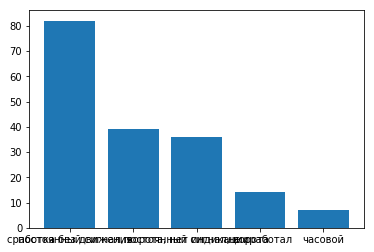

In [56]:
plt.bar(X[:5],Y[:5])